In [106]:
#all import statements
import os
import pandas as pd
import torch 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [107]:
#function to train the model
def modeltrain(X_train, y_train,l2_lambda=0.01,verbose=True):  # Specify the regularization strength (lambda)
    # global model
    input_size = X_train.shape[1]
    model = nn.Linear(input_size, 1).double()  # Double data type for weight tensor

    # Define loss function and optimizer with L2 regularization
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=l2_lambda)  # Adding weight decay for L2 regularization

    # Train the model (rest of the code remains the same)
    num_epochs = 1000

    if verbose==True:
        for epoch in range(num_epochs):
            # Forward pass
            outputs = model(X_train.double())  # Ensure input data type matches model's weight data type
            loss = criterion(outputs, y_train.view(-1, 1))

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (epoch + 1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

    print('Training Done')
    return model


In [108]:
#function to test the model

def modeltest(X_test,y_test,model,verbose=True):
    if verbose:
        print("Testing starting")
    
    # Assuming 'model' is your trained linear regression model
 
    with torch.no_grad():
        predictions = model(X_test)



    if verbose:
        print('testing over now accuracy analysis')

    correct_pred=0
    for i in range(len(predictions)):
       
        if(abs(predictions[i]-y_test[i])<0.5):
            
            correct_pred+=1
    mean_accuracy=(correct_pred/len(predictions))*100
    

    #loop used to extract few records for prediction of model on new data points
    # for i in range(8):
    #     print("prediction=",predictions[i],"target=",y_test[i],X_test[i][0])
    

    #Calculation of mae,mse and r2 squared 
    mae = (mean_absolute_error(y_test, predictions))
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions.numpy())
    
    if verbose:        
        print(f'Percentage Accuracy: {mean_accuracy:.2f}%')
        print(f'Mean Absolute Error: {mae}')
        print(f'Mean Squared Error: {mse}')
        print(f'R-squared: {r2}')

    # Printing  the model parameters (coefficients)
    # for name, param in model.named_parameters():
    #     if param.requires_grad:
    #         print(f'{name}: {param.data.numpy()}')

    return predictions

    

In [109]:

def create_plot(X,y,z):
   
    feature_to_plot=[]
    list2=[]
    for i in range(len(X)):
        feature_to_plot.append(i+1)
        
    # feature_to_plot1 = X[:,0] 
    # feature_to_plot2 = X[:,1] 

    # feature_to_plot3 = X[:,2] 
    for i in range(len(y)):
        # list2.append([y[i].item(),z[i].item()])
         list2.append([z[i].item(),y[i].item()])
    # print(list2)
    list2.sort()
    y=[]
    z=[]
    for i in range(len(list2)):
        y.append(list2[i][1])
        z.append(list2[i][0])


    # Create a scatter plotc.ear
   
    plt.scatter(feature_to_plot,y,label='label(y)',alpha=0.5,color='red')

    # # plt.scatter(feature_to_plot3, y, alpha=0.5)  #line plot
    #Creating plot with label and axis name
    plt.plot(feature_to_plot,z,label='prediction(z)',alpha=0.5)
    # plt.plot(y,z,alpha=0.5)
    plt.legend()
    plt.xlabel('Data Point')  # Replace with the appropriate feature name
    plt.ylabel('prediction(z),label(y)')
    plt.title('Prediction(z),label(y) vs. Data Point')
    plt.show()

In [110]:
model=None
X_train=None
y_train=None
X_test=None
y_test=None
def tester(testing_row=None,flag=0):
   
    if testing_row is None:
        print("input size is ",X_test.shape," and output size is ",(y_test.shape))
        # pred=0
        pred=modeltest(X_test,y_test,model,verbose=False)
        
    else:
        
        # print(X_test[testing_row].shape)
        # print(y_test[testing_row].shape)
        x1=X_test[testing_row].view(1,-1)
        y1=y_test[testing_row].view(1)
        print("input size is ",x1.shape," and output size is ",(y1.shape))
        # print(x1.shape)

        # print(y1.shape)
        pred=0
        pred=modeltest(x1,y1,model,verbose=False)
        pred1=pred.item()
        # print("---------------------------------------------------------")
        print("input features are : ",(x1).tolist())
        print("prediction is ",round(pred1,2))
        y1=y1.item()
        print("actual value is ",round(y1,2))
        print("relative error is ",round(abs((y1-pred1)*100/y1),2),"%")
        
        
        error=round(abs((y1-pred1)*100/y1),2)
        if error<0:
            raise ZeroDivisionError
        print("---------------------------------------------------------")
        if (flag==1):
            t=(error,testing_row)
            return t
        
         
    # print(type(pred))
    return pred
        


<class 'torch.Tensor'>
Epoch [100/1000], Loss: 4.131108025522295
Epoch [200/1000], Loss: 4.00659279141622
Epoch [300/1000], Loss: 3.9546869542968786
Epoch [400/1000], Loss: 3.929420068238158
Epoch [500/1000], Loss: 3.915380658389018
Epoch [600/1000], Loss: 3.9067374574761655
Epoch [700/1000], Loss: 3.901048719371689
Epoch [800/1000], Loss: 3.897152486603935
Epoch [900/1000], Loss: 3.894419911525114
Epoch [1000/1000], Loss: 3.8924738629659656
Training Done
input size is  torch.Size([90, 3])  and output size is  torch.Size([90])
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([90, 3])
torch.Size([90])
torch.Size([90, 1])


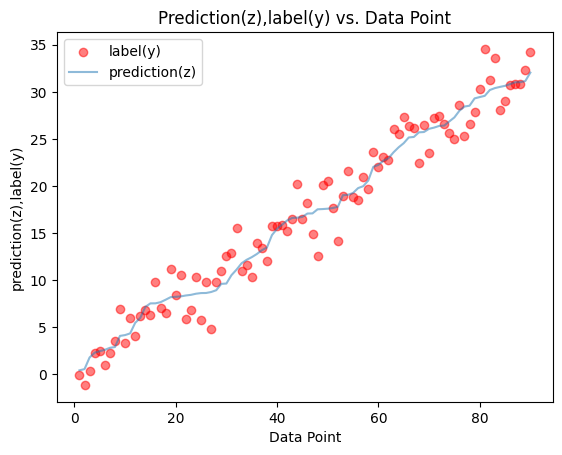

Linear(in_features=3, out_features=1, bias=True)
------------------------------------------------


In [111]:
# create_plot(X_train,y_train)
# model = load_or_initialize_model(X_train,y_train)

def train_with_selected_features(drop_features=[],testing=True):
    if type(drop_features)==type("string"):
        drop_features=[drop_features]
    global model
    global X_test
    global y_test
    global X_train
    global y_train
    
    #Data  proccessing and normalisation 

    df = pd.read_csv('Q3_complex_linear_regression_dataset.csv')




    # Define a mapping from categories to numerical values
    if 'X3' not in drop_features:
    
        category_mapping = {'A': 1.0, 'B': 2.0, 'C': 3.0}
        df['X3'] = df['X3'].map(category_mapping)

    # Separate the target variable 'y' from the input features.

    drop_features.append('y')
    X = df.drop(columns=drop_features)
    # X = df.drop(columns=['y'])
    y = df['y']

    for column in X.columns:
        try:
            X[column] = X[column].astype(float)
        except ValueError:
            print(f"Column '{column}' cannot be converted to float.")



    # Convert the DataFrame to a PyTorch tensor.
    X = torch.tensor(X.values, dtype=torch.float64)
    # Convert the target variable to a PyTorch tensor.
    y = torch.tensor(y.values, dtype=torch.float64)
    X1=X


    size=len(X)
    train_ratio=0.7
    train_size=int(size*train_ratio)
    # test_size=size-train_size


    #Splitting the data in training and testing data 


    #Training data
    X_train=X[:train_size]
    y_train=y[:train_size]

    #Testing data
    
    X_test=X[train_size:]
    y_test=y[train_size:]

    print(type(y_test))
    
    model=modeltrain(X_train, y_train,l2_lambda=0.01,verbose=testing)  # You can adjust the regularization st

    # pred=modeltest(X_test,y_test,model)
    
    if testing==True:
        pred=tester()
        # print(X_test.shape,y_test.shape,pred.shape)
        print(type(y_test))
        print(type(pred))
        for i in [X_test,y_test,pred]:
        # for i in [X_test]:
            print(i.shape)
        create_plot(X_test,y_test,pred)
        
        print(model)
    print("------------------------------------------------")
    
    # return X_test

train_with_selected_features()

In [112]:
#Relation of input variables with each other (EDA)
input1=[]
input2=[]
input3=[]
output=[]
for i in range(len(X_train)):
    c=X_train[i][0]

    input1.append(c.item())
    c=X_train[i][1]

    input2.append(c.item())
    c=X_train[i][2]
    input3.append(c.item())
    c=y_train[i]
    output.append(c.item())


covariance_matrix = np.cov(input1, input2)

# Extract the covariance between the two variables from the covariance matrix


# print("Covariance between input1 and input2:", covariance)

covariance_matrix1 = np.cov(input1, input3)
covariance_matrix2 = np.cov(input3, input2)
covariance_matrix3=np.cov(input1, output)
covariance_matrix4=np.cov(input2, output)
covariance_matrix5=np.cov(input3, output)
covariance = covariance_matrix[0, 1]
covariance1 = covariance_matrix1[0, 1]
covariance2 = covariance_matrix2[0, 1]
covariance3 = covariance_matrix3[0, 1]
covariance4 = covariance_matrix4[0, 1]
covariance5 = covariance_matrix5[0, 1]

#Extracting correlation factor between target and each input
correlation_coefficient1 = np.corrcoef(input1, y_train)[0, 1]
correlation_coefficient2 = np.corrcoef(input2, y_train)[0, 1]
correlation_coefficient3 = np.corrcoef(input3, y_train)[0, 1]



print("Covariance between X1 and X2:", covariance)
print("Covariance between X2 and X3:", covariance1)
print("Covariance between X3 and X1:", covariance2)
print("Covariance between X1 and y:", covariance3)
print("Covariance between X2 and y:", covariance4)
print("Covariance between X3 and y:", covariance5)

print("---------------------------------------------------")

print(f"Correlation Coefficient between X1 and y: {correlation_coefficient1:.2f}")
print(f"Correlation Coefficient between X2 and y: {correlation_coefficient2:.2f}")
print(f"Correlation Coefficient between X3 and y: {correlation_coefficient3:.2f}")





Covariance between X1 and X2: 0.12740488844015435
Covariance between X2 and X3: 0.015396627005088991
Covariance between X3 and X1: -0.014171793119161571
Covariance between X1 and y: 24.942920604841778
Covariance between X2 and y: 0.9254363356859601
Covariance between X3 and y: 0.11293652151999131
---------------------------------------------------
Correlation Coefficient between X1 and y: 0.97
Correlation Coefficient between X2 and y: 0.20
Correlation Coefficient between X3 and y: 0.01


In [113]:
#




In [114]:
#Function  to remove any two features and train the model


Linear(in_features=3, out_features=1, bias=True)
<class 'torch.Tensor'>
Epoch [100/1000], Loss: 4.311687147644175
Epoch [200/1000], Loss: 4.043502798781188
Epoch [300/1000], Loss: 3.950580293982756
Epoch [400/1000], Loss: 3.916371591645334
Epoch [500/1000], Loss: 3.9026429341529103
Epoch [600/1000], Loss: 3.8964308263047216
Epoch [700/1000], Loss: 3.893211856373657
Epoch [800/1000], Loss: 3.891327610841744
Epoch [900/1000], Loss: 3.890120383667545
Epoch [1000/1000], Loss: 3.8892995208236356
Training Done
input size is  torch.Size([90, 3])  and output size is  torch.Size([90])
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([90, 3])
torch.Size([90])
torch.Size([90, 1])


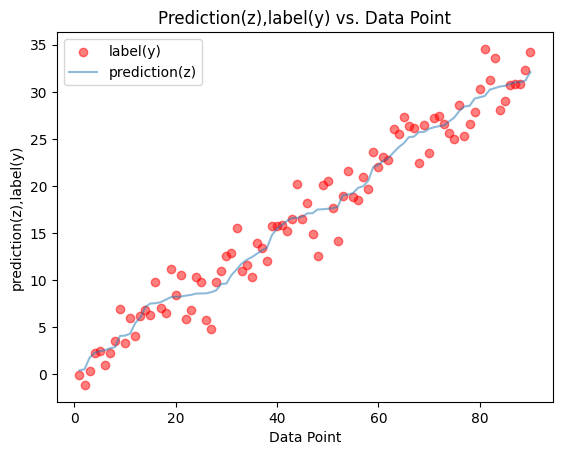

Linear(in_features=3, out_features=1, bias=True)
------------------------------------------------
<class 'torch.Tensor'>
Epoch [100/1000], Loss: 89.28819975666877
Epoch [200/1000], Loss: 83.94035005999872
Epoch [300/1000], Loss: 81.51421016160485
Epoch [400/1000], Loss: 80.24696521996135
Epoch [500/1000], Loss: 79.51105017971375
Epoch [600/1000], Loss: 79.0542286118136
Epoch [700/1000], Loss: 78.75942429175838
Epoch [800/1000], Loss: 78.56467524504086
Epoch [900/1000], Loss: 78.43394765902583
Epoch [1000/1000], Loss: 78.34505053756513
Training Done
input size is  torch.Size([90, 2])  and output size is  torch.Size([90])
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([90, 2])
torch.Size([90])
torch.Size([90, 1])


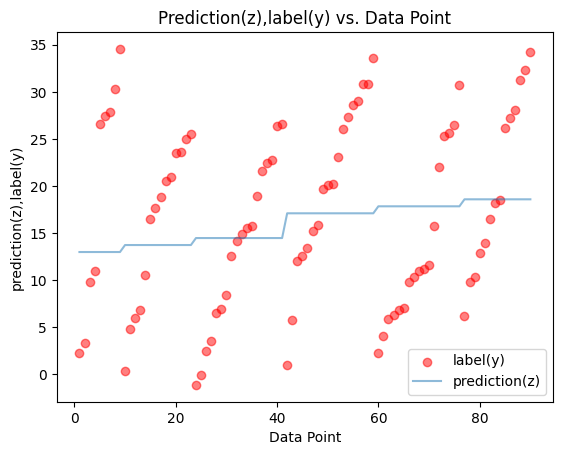

Linear(in_features=2, out_features=1, bias=True)
------------------------------------------------
<class 'torch.Tensor'>
Epoch [100/1000], Loss: 5.047063641374983
Epoch [200/1000], Loss: 5.0385478973356115
Epoch [300/1000], Loss: 5.035333501428831
Epoch [400/1000], Loss: 5.034112440131049
Epoch [500/1000], Loss: 5.033643910756714
Epoch [600/1000], Loss: 5.033461318948533
Epoch [700/1000], Loss: 5.03338848610402
Epoch [800/1000], Loss: 5.033358453187494
Epoch [900/1000], Loss: 5.033345507378484
Epoch [1000/1000], Loss: 5.033339616051116
Training Done
input size is  torch.Size([90, 1])  and output size is  torch.Size([90])
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([90, 1])
torch.Size([90])
torch.Size([90, 1])


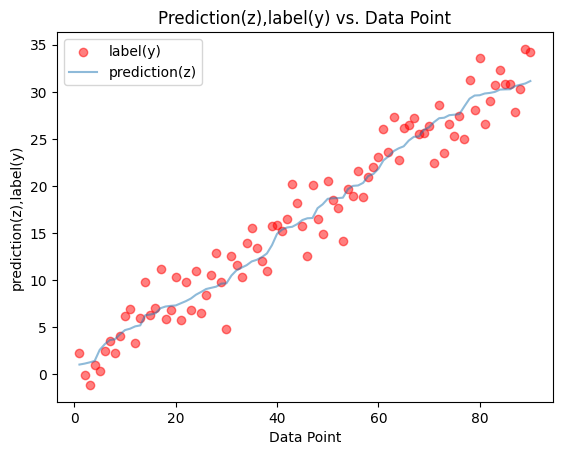

Linear(in_features=1, out_features=1, bias=True)
------------------------------------------------


In [115]:
### You can uncomment these two to run the code for model predictions by removing one and two features respectively.


print(model)
train_with_selected_features()

# Function  to remove any one features and train the model
train_with_selected_features('X1')

# Function  to remove any one features and train the model
train_with_selected_features(['X2','X3'])

# all

In [116]:
# doesnt alter model, only tests:
# testing over all values:
tester()



input size is  torch.Size([90, 1])  and output size is  torch.Size([90])


tensor([[31.1444],
        [ 7.3069],
        [21.0582],
        [ 8.7377],
        [ 1.2586],
        [23.9954],
        [10.4851],
        [12.4405],
        [18.7541],
        [26.2351],
        [20.0074],
        [27.5172],
        [ 9.0527],
        [25.2179],
        [ 6.3435],
        [29.9872],
        [21.8105],
        [ 7.2641],
        [29.8201],
        [23.1471],
        [ 8.4486],
        [ 7.1964],
        [16.5931],
        [ 1.4131],
        [ 7.0164],
        [13.7110],
        [12.1541],
        [14.9095],
        [ 9.1787],
        [18.7068],
        [27.2462],
        [ 4.2445],
        [16.5678],
        [ 4.6925],
        [22.7158],
        [12.8287],
        [18.0484],
        [ 6.2708],
        [ 5.0864],
        [15.6640],
        [11.5821],
        [29.6063],
        [24.2095],
        [23.6960],
        [28.4748],
        [ 3.1932],
        [17.6407],
        [18.6357],
        [30.2690],
        [ 9.6261],
        [ 8.0445],
        [ 3.7132],
        [ 1.

In [117]:
# testing for particular value with all features:
train_with_selected_features(testing=False)
# abs(2-3)
# print(type(tester(4,flag=1)[1]))
l1=[]
for i in range(0,90):
    l1.append(tester(i,flag=1))

# testing for particular value with only X1 feature:
train_with_selected_features(['X2','X3'],testing=False)
# tester(2)
l2=[]
for i in range(0,90):
    l2.append(tester(i,flag=1))

<class 'torch.Tensor'>
Training Done
------------------------------------------------
input size is  torch.Size([1, 3])  and output size is  torch.Size([1])
input features are :  [[9.903389473967044, 1.0, 3.0]]
prediction is  -5.65
actual value is  34.23
relative error is  116.51 %
---------------------------------------------------------
input size is  torch.Size([1, 3])  and output size is  torch.Size([1])
input features are :  [[2.16896984398474, 1.0, 3.0]]
prediction is  -1.32
actual value is  10.29
relative error is  112.78 %
---------------------------------------------------------
input size is  torch.Size([1, 3])  and output size is  torch.Size([1])
input features are :  [[6.630782031001008, 0.0, 2.0]]
prediction is  -3.43
actual value is  20.9
relative error is  116.41 %
---------------------------------------------------------
input size is  torch.Size([1, 3])  and output size is  torch.Size([1])
input features are :  [[2.6332237673715064, 0.0, 3.0]]
prediction is  -1.12
actu

c:\Users\pande\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\pande\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\pande\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\pande\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\pande\AppData\Local\Programs\Python\Python311\L

In [118]:
l1.sort()
l2.sort()

In [119]:
l1

[(104.6, 45),
 (105.51, 86),
 (106.01, 81),
 (109.14, 75),
 (110.68, 73),
 (111.01, 80),
 (111.47, 37),
 (111.5, 6),
 (111.85, 24),
 (111.99, 28),
 (112.78, 1),
 (113.02, 56),
 (113.69, 33),
 (114.08, 12),
 (114.39, 49),
 (114.44, 20),
 (114.56, 47),
 (114.67, 39),
 (114.73, 68),
 (114.75, 51),
 (114.96, 64),
 (115.05, 40),
 (115.29, 76),
 (115.48, 50),
 (115.64, 22),
 (115.92, 78),
 (115.93, 84),
 (116.17, 19),
 (116.19, 25),
 (116.21, 43),
 (116.3, 34),
 (116.35, 9),
 (116.41, 2),
 (116.42, 66),
 (116.46, 67),
 (116.51, 0),
 (116.76, 10),
 (116.79, 13),
 (116.8, 42),
 (116.98, 29),
 (116.99, 53),
 (117.0, 89),
 (117.04, 46),
 (117.07, 11),
 (117.14, 61),
 (117.15, 5),
 (117.16, 59),
 (117.19, 3),
 (117.25, 55),
 (117.37, 26),
 (117.37, 60),
 (117.54, 79),
 (117.56, 83),
 (117.68, 16),
 (117.7, 87),
 (117.78, 62),
 (117.83, 54),
 (117.9, 15),
 (117.91, 27),
 (117.93, 38),
 (118.22, 63),
 (118.24, 48),
 (118.27, 35),
 (118.34, 57),
 (118.62, 82),
 (118.8, 72),
 (118.81, 88),
 (118.88, 

In [120]:
l2

[(11.88, 23),
 (45.88, 51),
 (52.94, 45),
 (54.95, 70),
 (55.51, 38),
 (63.05, 73),
 (65.05, 86),
 (67.25, 31),
 (67.63, 85),
 (68.81, 3),
 (69.51, 21),
 (71.9, 50),
 (73.35, 17),
 (73.76, 14),
 (74.0, 32),
 (74.54, 8),
 (75.09, 75),
 (75.1, 12),
 (75.5, 35),
 (75.97, 83),
 (76.4, 74),
 (76.54, 36),
 (77.15, 33),
 (77.87, 49),
 (78.27, 7),
 (78.33, 71),
 (78.91, 30),
 (79.15, 46),
 (79.3, 62),
 (79.3, 81),
 (79.47, 84),
 (79.48, 44),
 (79.48, 79),
 (79.62, 29),
 (79.71, 77),
 (79.89, 10),
 (79.9, 18),
 (80.09, 28),
 (80.29, 69),
 (80.33, 88),
 (80.5, 5),
 (80.5, 57),
 (80.75, 64),
 (80.8, 26),
 (80.9, 72),
 (80.97, 27),
 (80.99, 2),
 (81.03, 41),
 (81.07, 59),
 (81.25, 11),
 (81.5, 82),
 (81.55, 6),
 (81.55, 65),
 (81.71, 61),
 (81.74, 19),
 (81.78, 54),
 (81.82, 9),
 (81.82, 67),
 (81.85, 60),
 (81.89, 20),
 (82.07, 25),
 (82.14, 40),
 (82.3, 16),
 (82.33, 68),
 (82.38, 1),
 (82.42, 48),
 (82.45, 63),
 (82.5, 47),
 (82.53, 15),
 (82.53, 78),
 (82.75, 87),
 (82.77, 55),
 (82.9, 42),
 (

In [121]:
a=[0]*90
for i in range(0,90):
    # print(l1[i][1],"\t",l2[i][1])
    a[l1[i][1]]+=l1[i][0]
    a[l2[i][1]]+=l2[i][0]
for i in range(0,90):
    a[i]=[a[i],i]
a.sort()
    



In [122]:
a

[[149.07999999999998, 23],
 [157.54, 45],
 [160.63, 51],
 [170.56, 86],
 [173.44, 38],
 [173.73000000000002, 73],
 [182.94, 70],
 [184.23000000000002, 75],
 [185.31, 81],
 [186.0, 3],
 [187.38, 50],
 [187.51, 31],
 [189.18, 12],
 [190.84, 33],
 [192.07999999999998, 28],
 [192.26, 49],
 [192.62, 21],
 [192.8, 14],
 [193.05, 6],
 [193.53, 83],
 [193.62, 17],
 [193.69, 85],
 [193.76999999999998, 35],
 [194.64, 80],
 [194.68, 37],
 [195.16, 1],
 [195.31, 8],
 [195.4, 84],
 [195.42000000000002, 36],
 [195.70999999999998, 64],
 [196.07999999999998, 24],
 [196.19, 46],
 [196.32999999999998, 20],
 [196.51999999999998, 56],
 [196.60000000000002, 29],
 [196.65, 10],
 [196.8, 74],
 [197.02, 79],
 [197.06, 47],
 [197.06, 68],
 [197.07999999999998, 62],
 [197.19, 40],
 [197.39999999999998, 2],
 [197.65, 5],
 [197.91, 19],
 [197.93, 71],
 [198.01999999999998, 7],
 [198.17, 9],
 [198.17000000000002, 26],
 [198.23, 59],
 [198.26, 25],
 [198.27999999999997, 67],
 [198.32, 11],
 [198.34, 30],
 [198.45, 